In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/19/data.csv')

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## Exploratory Data Analysis

In [ ]:
import seaborn as sns

In [ ]:
features = df.iloc[:,:-1]

In [ ]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
df['safety'].value_counts()

safety
low     576
med     576
high    576
Name: count, dtype: int64

In [ ]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

<Axes: xlabel='buying', ylabel='count'>

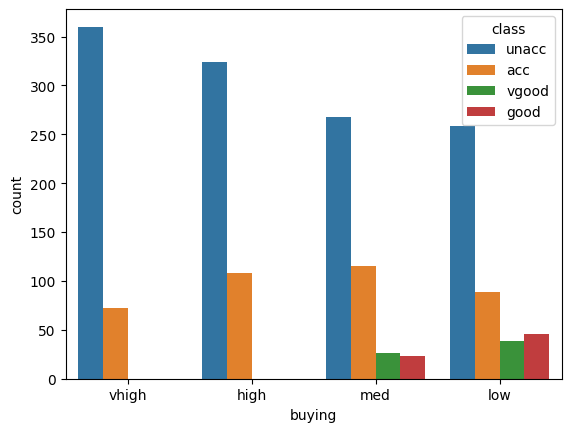

In [ ]:
sns.countplot(data=df, x='buying', hue='class')

<Axes: xlabel='maint', ylabel='count'>

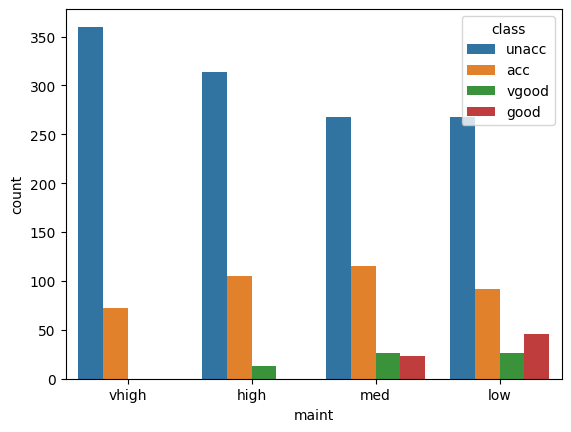

In [ ]:
sns.countplot(data = df, x='maint', hue='class')

**Key Finding:** The Main Keypoint here is that the low maintainance and low price cars are more Safer than the pricy ones


.

## Encoding the data

We need to encode to the data using LabelEncoder So that we can apply classification algorithms


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mapping = {
    'buying': {'vhigh':3,'high':2,'med':1,'low':0},
    'maint': {'vhigh':3,'high':2,'med':1,'low':0},
    'safety': {'high':2,'med':1,'low':0},
    'persons':{'more':2,'4':1,'2':0},
    'doors' : {'5more':3,'4':2,'3':1,'2':0},
    'lug_boot':{'big':2,'med':1,'small':0},
    'class':{'vgood':3,'good':2,'acc':1,'unacc':0}
}

In [ ]:
clean_data = df.copy()
encoder = LabelEncoder()

In [ ]:
for col in clean_data.columns:
  clean_data[col] = encoder.fit_transform(clean_data[col].map(mapping[col]))


In [ ]:
clean_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


#Finding Most suitable Model For Classification

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
X = clean_data.iloc[:,:-1]
y = clean_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, train_size = 0.3)

In [ ]:
bag = BaggingClassifier(estimator = DecisionTreeClassifier(),
                        n_estimators = 100,
                        max_samples = 0.25,
                        bootstrap = True,
                        random_state = 42,
                        oob_score = True
                        )

In [ ]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=100, oob_score=True, random_state=42)

In [ ]:
y_pred = bag.predict(X_test)

## Accuracy Score

In [ ]:
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.9495867768595041

##F1 Score

In [ ]:
f1= f1_score(y_pred,y_test,average = 'weighted')

In [ ]:
f1

0.9494788508773863

##OOB Score

In [ ]:
oob = bag.oob_score_

In [ ]:
oob

0.9401544401544402